In [2]:
import pandas as pd
import requests
import io
pd.set_option('display.max_rows', 500)

import os; os.chdir("/Users/gloftus/covid-king/")

# Get data for daily regions (cases)

## U.K., Sweden, U.S.

In [3]:
response = requests.get("https://covid.ourworldindata.org/data/owid-covid-data.csv")
data_raw = response.content.decode('utf-8')
data_raw_str = io.StringIO(data_raw)
df_countries = pd.read_csv(data_raw_str, index_col="date", parse_dates=True)

RelevantCountries= df_countries.query("iso_code in ['GBR','SWE','USA']")
RelevantCountries = RelevantCountries.pivot(columns='iso_code', values='total_cases')
RelevantCountries = RelevantCountries[RelevantCountries.index > "2020-03-01"]
# RelevantCountries.to_csv("RelevantCountries.cases.csv")

## E.U.

In [4]:
EU = df_countries.query("iso_code in ['DEU', 'DNK', 'FIN', 'NLD', 'NOR', 'ITA', 'ESP', 'FRA', 'BEL', 'LUX', 'CHE', 'AUT','SVN','PRT', 'POL', 'CZE', 'SVK','HUN','HRV','ROU','BGR','GRC','EST','LVA','LTU','IRL','MLT']")

EU = EU.pivot(columns='iso_code', values='total_cases')
EU = EU[EU.index > "2020-03-01"]
EU = EU.sum(axis=1)

In [5]:
# If we want the actual E.U...
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)
EUSeparate = df_countries.query("iso_code in ['DEU', 'DNK', 'FIN', 'NLD', 'SWE', 'NOR', 'ITA', 'ESP', 'FRA', 'BEL', 'LUX', 'CYP', 'AUT','SVN','PRT', 'POL', 'CZE', 'SVK','HUN','HRV','ROU','BGR','GRC','EST','LVA','LTU','IRL','MLT']")
EUSeparate = EUSeparate.pivot(columns='iso_code', values='total_cases')
EEUSeparate = EUSeparate[EUSeparate.index > "2020-03-01"]

NonEU= df_countries.query("iso_code in ['GBR','CHE','BIH', 'SRB']")
NonEU = NonEU.pivot(columns='iso_code', values='total_cases')
NonEU = NonEU[NonEU.index > "2020-03-01"]


## States

In [6]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantStates = df.query("state in ['Arizona', 'Hawaii','Washington']")
RelevantStates = RelevantStates.pivot(columns='state', values = 'cases')
RelevantStates = RelevantStates[RelevantStates.index > "2020-03-01"]

## New York City and King County

In [7]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

KC = df.query("(state == 'Washington') & (county in ['King'])")
KC= KC.pivot(columns='county', values='cases')
KC = KC[KC.index > "2020-03-01"]

NYC = df.query("(state == 'New York') & (county in ['New York City'])")
NYC= NYC.pivot(columns='county', values='cases')
NYC = NYC[NYC.index > "2020-03-01"]

## Consolodate and output

In [8]:
Regions = pd.concat([EU, RelevantCountries, RelevantStates, NYC, KC], axis=1)
Regions.to_csv("data/Regions.cases.csv")
# Regions.to_csv("/Users/gloftus/covid-king/data/Regions.cases.csv")

## Ireland, UK, Portugal, Spain

In [9]:
response = requests.get("https://covid.ourworldindata.org/data/owid-covid-data.csv")
data_raw = response.content.decode('utf-8')
data_raw_str = io.StringIO(data_raw)
df_countries = pd.read_csv(data_raw_str, index_col="date", parse_dates=True)

GWC= df_countries.query("iso_code in ['IRL','GBR', 'PRT', 'ESP']")
GWC = GWC.pivot(columns='iso_code', values='total_cases')
GWC = GWC[GWC.index > "2020-01-25"]

GWD= df_countries.query("iso_code in ['IRL','GBR', 'PRT', 'ESP']")
GWD = GWD.pivot(columns='iso_code', values='total_deaths')
GWD = GWD[GWD.index > "2020-01-25"]

GW = pd.concat([GWC, GWD], axis = 1)

GW.to_csv("data/WesternEurope.CasesDeaths.csv")

# Get data for daily regions (deaths)

## U.K., Sweden, U.S.

In [9]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantCountries= df_countries.query("iso_code in ['GBR','SWE','USA']")
RelevantCountries = RelevantCountries.pivot(columns='iso_code', values='total_deaths')
RelevantCountries = RelevantCountries[RelevantCountries.index > "2020-03-01"]
# RelevantCountries.to_csv("RelevantCountries.Deaths.csv")

## E.U.

In [10]:
EU = df_countries.query("iso_code in ['DEU', 'DNK', 'FIN', 'NLD', 'NOR', 'ITA', 'ESP', 'FRA', 'BEL', 'LUX', 'CHE', 'AUT','SVN','PRT', 'POL', 'CZE', 'SVK','HUN','HRV','ROU','BGR','GRC','EST','LVA','LTU','IRL','MLT']")

EU = EU.pivot(columns='iso_code', values='total_deaths')
EU = EU[EU.index > "2020-03-01"]
EU = EU.sum(axis=1)

In [11]:
# If we want the actual E.U...
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)
EUSeparate = df_countries.query("iso_code in ['DEU', 'DNK', 'FIN', 'NLD', 'SWE', 'NOR', 'ITA', 'ESP', 'FRA', 'BEL', 'LUX', 'CYP', 'AUT','SVN','PRT', 'POL', 'CZE', 'SVK','HUN','HRV','ROU','BGR','GRC','EST','LVA','LTU','IRL','MLT']")
EUSeparate = EUSeparate.pivot(columns='iso_code', values='total_deaths')
EEUSeparate = EUSeparate[EUSeparate.index > "2020-03-01"]

NonEU= df_countries.query("iso_code in ['GBR','CHE','BIH', 'SRB']")
NonEU = NonEU.pivot(columns='iso_code', values='total_deaths')
NonEU = NonEU[NonEU.index > "2020-03-01"]

## States

In [12]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantStates = df.query("state in ['Arizona', 'Hawaii','Washington']")
RelevantStates = RelevantStates.pivot(columns='state', values = 'deaths')
RelevantStates = RelevantStates[RelevantStates.index > "2020-03-01"]

## New York City and King County

In [13]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

KC = df.query("(state == 'Washington') & (county in ['King'])")
KC= KC.pivot(columns='county', values='deaths')
KC = KC[KC.index > "2020-03-01"]

NYC = df.query("(state == 'New York') & (county in ['New York City'])")
NYC= NYC.pivot(columns='county', values='deaths')
NYC = NYC[NYC.index > "2020-03-01"]

## Consolodate and output

In [14]:
Regions = pd.concat([EU, RelevantCountries, RelevantStates, NYC, KC], axis=1)
Regions.to_csv("Regions.deaths.csv")
# Regions

# For European Cases and Deaths

### Cases

In [9]:
EU1 = df_countries.query("iso_code in ['IRL','GBR', 'PRT', 'ESP', 'FRA', 'ITA', 'BEL', 'LUX']")
EU1 = EU1.pivot(columns='iso_code', values='total_cases')
EU1 = EU1[EU1.index > "2020-03-25"]
EU1.to_csv("EU1.csv")


In [10]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)
EU2 = df_countries.query("iso_code in ['NLD', 'DEU', 'AUT', 'POL', 'CHE', 'SVN', 'CZE', 'SVK']")
EU2 = EU2.pivot(columns='iso_code', values='total_cases')
EU2 = EU2[EU2.index > "2020-03-25"]
EU2.to_csv("EU2.csv")


In [11]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)
EU3 = df_countries.query("iso_code in ['HUN', 'EST', 'LTU',  'LVA',  'SWE', 'NOR', 'DNK', 'FIN']")
EU3 = EU3.pivot(columns='iso_code', values='total_cases')
EU3 = EU3[EU3.index > "2020-03-25"]
EU3.to_csv("EU3.csv")


In [12]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)
EU4 = df_countries.query("iso_code in ['ROU', 'BGR', 'SRB', 'BIH', 'HRV', 'GRC',  'CYP', 'MLT']")
EU4 = EU4.pivot(columns='iso_code', values='total_cases')
EU4 = EU4[EU4.index > "2020-03-25"]
EU4.to_csv("EU4.csv")


### Deaths

In [8]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)
EU1 = df_countries.query("iso_code in ['IRL','GBR', 'PRT', 'ESP', 'FRA', 'ITA', 'BEL', 'LUX']")
EU1 = EU1.pivot(columns='iso_code', values='total_deaths')
EU1 = EU1[EU1.index > "2020-03-25"]
EU1.to_csv("EU1.deaths.csv")


In [9]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)
EU2 = df_countries.query("iso_code in ['NLD', 'DEU', 'AUT', 'POL', 'CHE', 'SVN', 'CZE', 'SVK']")
EU2 = EU2.pivot(columns='iso_code', values='total_deaths')
EU2 = EU2[EU2.index > "2020-03-25"]
EU2.to_csv("EU2.deaths.csv")


In [10]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)
EU3 = df_countries.query("iso_code in ['HUN', 'EST', 'LTU',  'LVA',  'SWE', 'NOR', 'DNK', 'FIN']")
EU3 = EU3.pivot(columns='iso_code', values='total_deaths')
EU3 = EU3[EU3.index > "2020-03-25"]
EU3.to_csv("EU3.deaths.csv")


In [11]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)
EU4 = df_countries.query("iso_code in ['ROU', 'BGR', 'SRB', 'BIH', 'HRV', 'GRC',  'CYP', 'MLT', 'USA']")
EU4 = EU4.pivot(columns='iso_code', values='total_deaths')
EU4 = EU4[EU4.index > "2020-03-25"]
EU4.to_csv("EU4.deaths.csv")


## Relevant Regions (where people on my distribution list live)

### Cases

#### Relevant States

In [21]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantStates = df.query("state in ['Pennsylvania', 'Florida', 'Massachusetts','Maryland','New York','North Carolina','Indiana','Illinois','Nevada','Washington','Oregon','California']")
RelevantStates = RelevantStates.pivot(columns='state', values = 'cases')
RelevantStates = RelevantStates[RelevantStates.index > "2020-03-25"]

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

SoCal = df.query("(state == 'California') & (county in ['Santa Barbara', 'San Luis Obispo', 'Kern', 'Ventura','Los Angeles','Orange','Riverside','San Bernardino', 'San Diego', 'Imperial'])")
SoCal = SoCal.pivot(columns='county', values='cases')
SoCal = SoCal[SoCal.index > "2020-03-25"]
SoCalTotal = SoCal.sum(axis=1)

#### Canada and Italy

In [22]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)

CandI = df_countries.query("iso_code in ['CAN', 'ITA', 'GBR']")
CandI = CandI.pivot(columns='iso_code', values='total_cases')
CandI = CandI[CandI.index > "2020-03-25"]

#### Consolodate and output

In [23]:
RelevantStates = pd.concat([RelevantStates, CandI, SoCalTotal], axis=1)
RelevantStates.to_csv("RelevantStates.cases.csv")

### Deaths

#### Relevant States

In [8]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantStates = df.query("state in ['Pennsylvania', 'Florida', 'Massachusetts','Maryland','New York','North Carolina','Indiana','Illinois','Nevada','Washington','Oregon','California']")
RelevantStates = RelevantStates.pivot(columns='state', values='deaths')
RelevantStates = RelevantStates[RelevantStates.index > "2020-03-25"]
RelevantStates.to_csv("RelevantStates.deaths.csv")

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)


SoCal = df.query("(state == 'California') & (county in ['Santa Barbara', 'San Luis Obispo', 'Kern', 'Ventura','Los Angeles','Orange','Riverside','San Bernardino', 'San Diego', 'Imperial'])")
SoCal = SoCal.pivot(columns='county', values='deaths')
SoCal = SoCal[SoCal.index > "2020-03-25"]
SoCalTotal = SoCal.sum(axis=1)

#### Canada and Italy

In [9]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)

CandI = df_countries.query("iso_code in ['CAN', 'ITA', 'GBR']")
CandI = CandI.pivot(columns='iso_code', values='total_deaths')
CandI = CandI[CandI.index > "2020-03-25"]

#### Consolodate and output

In [10]:
RelevantStates = pd.concat([RelevantStates, CandI, SoCalTotal], axis=1)
RelevantStates.to_csv("RelevantStates.deaths.csv")

# County combinations

## Middle East

### Cases

In [9]:

ME = df_countries.query("iso_code in ['EGY','ISR','JOR','LBN']")
ME = ME.pivot(columns='iso_code', values='total_cases')
ME = ME[ME.index > "2020-01-25"]
ME.to_csv("ME.cases.csv")

### Deaths

In [10]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)

ME = df_countries.query("iso_code in ['EGY','ISR','JOR','LBN']")
ME = ME.pivot(columns='iso_code', values='total_deaths')
ME = ME[ME.index > "2020-01-25"]
ME.to_csv("ME.deaths.csv")

## Scandinavia

### Cases

In [9]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)

Scandinavia = df_countries.query("iso_code in ['SWE', 'FIN', 'DNK', 'NOR']")
Scandinavia = Scandinavia.pivot(columns='iso_code', values='total_cases')
Scandinavia = Scandinavia[Scandinavia.index > "2020-01-25"]
Scandinavia.to_csv("Scandinavia.cases.csv")

### Deaths

In [15]:
# url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)

Scandinavia = df_countries.query("iso_code in ['SWE', 'FIN', 'DNK', 'NOR']")
Scandinavia = Scandinavia.pivot(columns='iso_code', values='total_deaths')
Scandinavia = Scandinavia[Scandinavia.index > "2020-01-25"]
Scandinavia.to_csv("Scandinavia.deaths.csv")

## Asia

### Cases

In [8]:
# China, India, Indonesia, Japan, South Korea, Malaysia, Singapore,Taiwan
Asia = df_countries.query("iso_code in ['CHN', 'IDN', 'IND', 'JPN', 'KOR', 'MYS', 'SGP', 'TWN']")
Asia = Asia.pivot(columns='iso_code', values='total_cases')
Asia = Asia[Asia.index > "2020-01-25"]
Asia.to_csv("Asia.cases.csv")

### Deaths

In [11]:
# China, India, Indonesia, Japan, South Korea, Malaysia, Singapore,Taiwan
Asia = df_countries.query("iso_code in ['CHN', 'IDN', 'IND', 'JPN', 'KOR', 'MYS', 'SGP', 'TWN']")
Asia = Asia.pivot(columns='iso_code', values='total_deaths')
Asia = Asia[Asia.index > "2020-01-25"]
Asia.to_csv("Asia.deaths.csv")

# County combinations

In [10]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

## Washington State counties (large)

### Cases

In [3]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

WashCases = df.query("(state == 'Washington') & (county in ['Clark', 'Thurston', 'Yakima', 'King','Kitsap','Pierce','Snohomish','Spokane'])")

WashCases= WashCases.pivot(columns='county', values='cases')
WashCases = WashCases[WashCases.index > "2020-03-25"]
WashCases.to_csv("Wash.LargeCounties.Cases.csv")

### Deaths

In [8]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

WashDeaths = df.query("(state == 'Washington') & (county in ['Clark', 'Thurston', 'Yakima', 'King','Kitsap','Pierce','Snohomish','Spokane'])")

WashDeaths= WashDeaths.pivot(columns='county', values='deaths')
WashDeaths = WashDeaths[WashDeaths.index > "2020-03-25"]
WashDeaths.to_csv("Wash.LargeCounties.Deaths.csv")

## Washington State counties (small)

### Cases

In [23]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

EWC = df.query("(state == 'Washington') & (county in ['Benton','Chelan', 'Douglas', 'Franklin','Okanogan', 'Walla Walla','Whitman'])")
EWC= EWC.pivot(columns='county', values='cases')
EWC = EWC[EWC.index > "2020-03-25"]

WWC = df.query("(state == 'Washington') & (county in ['Clallam', 'Island', 'Jefferson', 'Lewis','San Juan', 'Skagit', 'Whatcom'])")
WWC= WWC.pivot(columns='county', values='cases')
WWC = WWC[WWC.index > "2020-03-25"]

WashCases = pd.concat([EWC, WWC], axis=1)

WashCases.to_csv("Wash.SmallCounties.Cases.csv")

### Deaths

In [11]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

EWC = df.query("(state == 'Washington') & (county in ['Benton','Chelan', 'Douglas', 'Franklin','Okanogan', 'Walla Walla','Whitman'])")
EWC= EWC.pivot(columns='county', values='deaths')
EWC = EWC[EWC.index > "2020-03-25"]

WWC = df.query("(state == 'Washington') & (county in ['Clallam', 'Island', 'Jefferson', 'Lewis','San Juan', 'Skagit', 'Whatcom'])")
WWC= WWC.pivot(columns='county', values='deaths')
WWC = WWC[WWC.index > "2020-03-25"]

WashCases = pd.concat([EWC, WWC], axis=1)

WashCases.to_csv("Wash.SmallCounties.Deaths.csv")

## Hawaii

### Cases

In [8]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Hawaii = df.query("(state == 'Hawaii') & (county in ['Honolulu', 'Kauai', 'Maui', 'Hawaii'])")
Hawaii = Hawaii.pivot(columns='county', values='cases')
Hawaii = Hawaii[Hawaii.index > "2020-03-25"]

Hawaii.to_csv("Hawaii.cases.csv")

### Deaths

In [9]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Hawaii = df.query("(state == 'Hawaii') & (county in ['Honolulu', 'Kauai', 'Maui', 'Hawaii'])")
Hawaii = Hawaii.pivot(columns='county', values='deaths')
Hawaii = Hawaii[Hawaii.index > "2020-03-25"]

Hawaii.to_csv("Hawaii.deaths.csv")

## Texas

### Cases

In [8]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Houston = df.query("(state == 'Texas') & (county in ['Harris', 'Fort Bend','Galveston', 'Montgomery', 'Brazoria'])")
Houston = Houston.pivot(columns='county', values='cases')
Houston = Houston[Houston.index > "2020-03-25"]
Houston= Houston.sum(axis=1)

Dallas = df.query("(state == 'Texas') & (county in ['Collin', 'Dallas', 'Denton', 'Tarrant'])")
Dallas = Dallas.pivot(columns='county', values='cases')
Dallas = Dallas[Dallas.index > "2020-03-25"]
Dallas= Dallas.sum(axis=1)

SanAntonio = df.query("(state == 'Texas') & (county in ['Bexar'])")
SanAntonio = SanAntonio.pivot(columns='county', values='cases')
SanAntonio = SanAntonio[SanAntonio.index > "2020-03-25"]

Austin = df.query("(state == 'Texas') & (county in ['Bell', 'Travis', 'Williamson'])")
Austin = Austin.pivot(columns='county', values='cases')
Austin = Austin[Austin.index > "2020-03-25"]
Austin= Austin.sum(axis=1)

ElPaso = df.query("(state == 'Texas') & (county in ['El Paso'])")
ElPaso = ElPaso.pivot(columns='county', values='cases')
ElPaso = ElPaso[ElPaso.index > "2020-03-25"]

SouthTexas = df.query("(state == 'Texas') & (county in ['Cameron', 'Nueces', 'Hidalgo'])")
SouthTexas = SouthTexas.pivot(columns='county', values='cases')
SouthTexas = SouthTexas[SouthTexas.index > "2020-03-25"]
SouthTexas= SouthTexas.sum(axis=1)

Others = df.query("(state == 'Texas') & (county in ['Lubbock', 'Webb'])")
Others = Others.pivot(columns='county', values='cases')
Others = Others[Others.index > "2020-03-25"]

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

AllTexas = df.query("state == 'Texas'")
AllTexas = AllTexas.pivot(columns='state', values='cases')
AllTexas = AllTexas[AllTexas.index > "2020-03-25"]

Texas = pd.concat([Houston, Dallas, SanAntonio, Austin, SouthTexas, ElPaso, Others, AllTexas], axis=1)


Texas.to_csv("Texas.cases.csv")

### Deaths

In [9]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Houston = df.query("(state == 'Texas') & (county in ['Harris', 'Fort Bend','Galveston', 'Montgomery', 'Brazoria'])")
Houston = Houston.pivot(columns='county', values='deaths')
Houston = Houston[Houston.index > "2020-03-25"]
Houston= Houston.sum(axis=1)

Dallas = df.query("(state == 'Texas') & (county in ['Collin', 'Dallas', 'Denton', 'Tarrant'])")
Dallas = Dallas.pivot(columns='county', values='deaths')
Dallas = Dallas[Dallas.index > "2020-03-25"]
Dallas= Dallas.sum(axis=1)

SanAntonio = df.query("(state == 'Texas') & (county in ['Bexar'])")
SanAntonio = SanAntonio.pivot(columns='county', values='deaths')
SanAntonio = SanAntonio[SanAntonio.index > "2020-03-25"]

Austin = df.query("(state == 'Texas') & (county in ['Bell', 'Travis', 'Williamson'])")
Austin = Austin.pivot(columns='county', values='deaths')
Austin = Austin[Austin.index > "2020-03-25"]
Austin= Austin.sum(axis=1)

ElPaso = df.query("(state == 'Texas') & (county in ['El Paso'])")
ElPaso = ElPaso.pivot(columns='county', values='deaths')
ElPaso = ElPaso[ElPaso.index > "2020-03-25"]

SouthTexas = df.query("(state == 'Texas') & (county in ['Cameron', 'Nueces', 'Hidalgo'])")
SouthTexas = SouthTexas.pivot(columns='county', values='deaths')
SouthTexas = SouthTexas[SouthTexas.index > "2020-03-25"]
SouthTexas= SouthTexas.sum(axis=1)

Others = df.query("(state == 'Texas') & (county in ['Lubbock', 'Webb'])")
Others = Others.pivot(columns='county', values='deaths')
Others = Others[Others.index > "2020-03-25"]

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

AllTexas = df.query("state == 'Texas'")
AllTexas = AllTexas.pivot(columns='state', values='deaths')
AllTexas = AllTexas[AllTexas.index > "2020-03-25"]

Texas = pd.concat([Houston, Dallas, SanAntonio, Austin, SouthTexas, ElPaso, Others, AllTexas], axis=1)


Texas.to_csv("Texas.deaths.csv")

## California counties

### Bay Area cases and deaths

In [8]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

In [9]:
BayArea = df.query("(state == 'California') & (county in ['Marin','Contra Costa','San Francisco','San Mateo', 'Santa Clara', 'Alameda'])")
BayArea = BayArea.pivot(columns='county', values='cases')
BayArea = BayArea[BayArea.index > "2020-03-25"]
BayArea["sums"] = BayArea.sum(axis=1)
BayArea.to_csv("BayArea.cases.csv")

In [10]:
BayArea = df.query("(state == 'California') & (county in ['Marin','Contra Costa','San Francisco','San Mateo', 'Santa Clara', 'Alameda'])")
BayArea = BayArea.pivot(columns='county', values='deaths')
BayArea = BayArea[BayArea.index > "2020-03-25"]
BayArea["sums"] = BayArea.sum(axis=1)
BayArea.to_csv("BayArea.deaths.csv")

### L.A. Area cases and deaths

In [11]:
SoCal = df.query("(state == 'California') & (county in ['Ventura','Los Angeles','Orange','Riverside','San Bernardino'])")
SoCal = SoCal.pivot(columns='county', values='cases')
SoCal = SoCal[SoCal.index > "2020-03-25"]
SoCal["sums"] = SoCal.sum(axis=1)
SoCal.to_csv("SoCal.cases.csv")

SoCal = df.query("(state == 'California') & (county in ['Ventura','Los Angeles','Orange','Riverside','San Bernardino'])")
SoCal = SoCal.pivot(columns='county', values='deaths')
SoCal = SoCal[SoCal.index > "2020-03-25"]
SoCal["sums"] = SoCal.sum(axis=1)
SoCal.to_csv("SoCal.deaths.csv")
# cali.sample(10)

### Other large CA county cases and deaths

In [12]:
CalCo = df.query("(state == 'California') & (county in ['Santa Cruz', 'San Diego','Sacramento','Fresno', 'Santa Barbara', 'Humboldt', 'Monterey'])")
CalCo = CalCo.pivot(columns='county', values='cases')
CalCo = CalCo[CalCo.index > "2020-03-25"]
# CalCo["sums"] = CalCo.sum(axis=1)
CalCo.to_csv("CalCo.cases.csv")
# cali.sample(10)

CalCo = df.query("(state == 'California') & (county in ['Santa Cruz', 'San Diego','Sacramento','Fresno', 'Santa Barbara', 'Humboldt', 'Monterey'])")
CalCo = CalCo.pivot(columns='county', values='deaths')
CalCo = CalCo[CalCo.index > "2020-03-25"]
# CalCo["sums"] = CalCo.sum(axis=1)
CalCo.to_csv("CalCo.deaths.csv")
# cali.sample(10)

# U.S. cities: cases

In [8]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

## East

In [9]:
Boston = df.query("(state == 'Massachusetts') & (county in ['Suffolk','Norfolk', 'Middlesex', 'Essex', 'Plymouth'])")
Boston = Boston.pivot(columns='county', values='cases')
Boston = Boston[Boston.index > "2020-03-25"]
Boston = Boston.sum(axis=1)

NYC = df.query("(state == 'New York') & (county in ['New York City'])")
NYC= NYC.pivot(columns='county', values='cases')
NYC = NYC[NYC.index > "2020-03-25"]

Philadelphia = df.query("(state == 'Pennsylvania') & (county == 'Philadelphia')")
Philadelphia = Philadelphia.pivot(columns='county', values='cases')
Philadelphia = Philadelphia[Philadelphia.index > "2020-03-25"]

Baltimore = df.query("county in ['Baltimore city']")
Baltimore = Baltimore.pivot(columns='county', values='cases')
Baltimore = Baltimore[Baltimore.index > "2020-03-25"]

DC = df.query("county in ['District of Columbia']")
DC = DC.pivot(columns='county', values='cases')
DC = DC[DC.index > "2020-03-25"]

Atlanta = df.query("(state == 'Georgia') & (county == 'Fulton')")
Atlanta = Atlanta.pivot(columns='county', values='cases')
Atlanta = Atlanta[Atlanta.index > "2020-03-25"]

Tampa = df.query("(state == 'Florida') & (county == 'Hillsborough')")
Tampa = Tampa.pivot(columns='county', values='cases')
Tampa = Tampa[Tampa.index > "2020-03-25"]

Miami = df.query("(state == 'Florida') & (county == 'Miami-Dade')")
Miami = Miami.pivot(columns='county', values='cases')
Miami = Miami[Miami.index > "2020-03-25"]


East = pd.concat([Boston, NYC, Philadelphia, Baltimore, DC, Atlanta, Tampa, Miami], axis=1)
East.to_csv("East.cases.csv")

## Mid-East

In [10]:
Buffalo = df.query("(state == 'New York') & (county in ['Erie'])")
Buffalo= Buffalo.pivot(columns='county', values='cases')
Buffalo = Buffalo[Buffalo.index > "2020-03-25"]

Pittsburgh = df.query("(state == 'Pennsylvania') & (county == 'Allegheny')")
Pittsburgh = Pittsburgh.pivot(columns='county', values='cases')
Pittsburgh = Pittsburgh[Pittsburgh.index > "2020-03-25"]

Cleveland = df.query("(state == 'Ohio') & (county == 'Cuyahoga')")
Cleveland = Cleveland.pivot(columns='county', values='cases')
Cleveland = Cleveland[Cleveland.index > "2020-03-25"]

Cincinnati = df.query("(state == 'Ohio') & (county == 'Hamilton')")
Cincinnati = Cincinnati.pivot(columns='county', values='cases')
Cincinnati = Cincinnati[Cincinnati.index > "2020-03-25"]

Detroit = df.query("(state == 'Michigan') & (county == 'Wayne')")
Detroit = Detroit.pivot(columns='county', values='cases')
Detroit = Detroit[Detroit.index > "2020-03-25"]

Nashville = df.query("(state == 'Tennessee') & (county == 'Davidson')")
Nashville = Nashville.pivot(columns='county', values='cases')
Nashville = Nashville[Nashville.index > "2020-03-25"]

Memphis = df.query("(state == 'Tennessee') & (county == 'Shelby')")
Memphis = Memphis.pivot(columns='county', values='cases')
Memphis = Memphis[Memphis.index > "2020-03-25"]

NOLA = df.query("(state == 'Louisiana') & (county == 'Orleans')")
NOLA = NOLA.pivot(columns='county', values='cases')
NOLA = NOLA[NOLA.index > "2020-03-25"]

MidEast = pd.concat([Buffalo, Pittsburgh, Cleveland, Cincinnati, Detroit, Nashville, Memphis, NOLA], axis=1)
MidEast.to_csv("MidEast.cases.csv")

## Mid-West

In [11]:
Indy = df.query("(state == 'Indiana') & (county in ['Marion'])")
Indy= Indy.pivot(columns='county', values='cases')
Indy = Indy[Indy.index > "2020-03-25"]

Chicago = df.query("(state == 'Illinois') & (county == 'Cook')")
Chicago = Chicago.pivot(columns='county', values='cases')
Chicago = Chicago[Chicago.index > "2020-03-25"]

Milwaukee = df.query("(state == 'Wisconsin') & (county == 'Milwaukee')")
Milwaukee = Milwaukee.pivot(columns='county', values='cases')
Milwaukee = Milwaukee[Milwaukee.index > "2020-03-25"]

Minneapolis = df.query("(state == 'Minnesota') & (county == 'Hennepin')")
Minneapolis = Minneapolis.pivot(columns='county', values='cases')
Minneapolis = Minneapolis[Minneapolis.index > "2020-03-25"]

StLouis = df.query("(state == 'Missouri') & (county == 'St. Louis')")
StLouis = StLouis.pivot(columns='county', values='cases')
StLouis = StLouis[StLouis.index > "2020-03-25"]

KansasCity = df.query("(state == 'Missouri') & (county == 'Jackson')")
KansasCity = KansasCity.pivot(columns='county', values='cases')
KansasCity = KansasCity[KansasCity.index > "2020-03-25"]

Houston = df.query("(state == 'Texas') & (county == 'Harris')")
Houston = Houston.pivot(columns='county', values='cases')
Houston = Houston[Houston.index > "2020-03-25"]

Dallas = df.query("(state == 'Texas') & (county == 'Dallas')")
Dallas = Dallas.pivot(columns='county', values='cases')
Dallas = Dallas[Dallas.index > "2020-03-25"]

MidWest = pd.concat([Indy, Chicago, Milwaukee, Minneapolis, StLouis, KansasCity, Houston, Dallas], axis=1)
MidWest.to_csv("MidWest.cases.csv")

## Mountain West

In [12]:
Denver = df.query("(state == 'Colorado') & (county == 'Denver')")
Denver = Denver.pivot(columns='county', values='cases')
Denver = Denver[Denver.index > "2020-03-25"]

SaltLake = df.query("(state == 'Utah') & (county == 'Salt Lake')")
SaltLake = SaltLake.pivot(columns='county', values='cases')
SaltLake = SaltLake[SaltLake.index > "2020-03-25"]

Albuquerque = df.query("(state == 'New Mexico') & (county == 'Bernalillo')")
Albuquerque = Albuquerque.pivot(columns='county', values='cases')
Albuquerque = Albuquerque[Albuquerque.index > "2020-03-25"]

Boise = df.query("(state == 'Idaho') & (county == 'Ada')")
Boise = Boise.pivot(columns='county', values='cases')
Boise = Boise[Boise.index > "2020-03-25"]

Phoenix = df.query("(state == 'Arizona') & (county == 'Maricopa')")
Phoenix = Phoenix.pivot(columns='county', values='cases')
Phoenix = Phoenix[Phoenix.index > "2020-03-25"]

Tucson = df.query("(state == 'Arizona') & (county == 'Pima')")
Tucson = Tucson.pivot(columns='county', values='cases')
Tucson = Tucson[Tucson.index > "2020-03-25"]

Reno = df.query("(state == 'Nevada') & (county == 'Washoe')")
Reno = Reno.pivot(columns='county', values='cases')
Reno = Reno[Reno.index > "2020-03-25"]

Vegas = df.query("(state == 'Nevada') & (county == 'Clark')")
Vegas = Vegas.pivot(columns='county', values='cases')
Vegas = Vegas[Vegas.index > "2020-03-25"]

MountainWest = pd.concat([Denver, SaltLake, Albuquerque, Boise, Phoenix, Tucson, Reno, Vegas], axis=1)
MountainWest.to_csv("MountainWest.cases.csv")

## West West

In [13]:
Seattle = df.query("(state == 'Washington') & (county in ['King','Pierce','Snohomish','Kitsap'])")

Seattle= Seattle.pivot(columns='county', values='cases')
Seattle = Seattle[Seattle.index > "2020-03-25"]
SeattleArea = Seattle.sum(axis=1)

Portland = df.query("(state == 'Oregon') & (county == 'Multnomah')")
Portland = Portland.pivot(columns='county', values='cases')
Portland = Portland[Portland.index > "2020-03-25"]

Sacramento = df.query("(state == 'California') & (county == 'Sacramento')")
Sacramento = Sacramento.pivot(columns='county', values='cases')
Sacramento = Sacramento[Sacramento.index > "2020-03-25"]

BayArea = df.query("(state == 'California') & (county in ['Marin','Contra Costa','San Francisco','San Mateo', 'Santa Clara', 'Alameda'])")
BayArea = BayArea.pivot(columns='county', values='cases')
BayArea = BayArea[BayArea.index > "2020-03-25"]
BayArea = BayArea.sum(axis=1)

SoCal = df.query("(state == 'California') & (county in ['Ventura','Los Angeles','Orange','Riverside','San Bernardino'])")
SoCal = SoCal.pivot(columns='county', values='cases')
SoCal = SoCal[SoCal.index > "2020-03-25"]
SoCal = SoCal.sum(axis=1)

SanDiego = df.query("(state == 'California') & (county in ['San Diego'])")
SanDiego = SanDiego.pivot(columns='county', values='cases')
SanDiego = SanDiego[SanDiego.index > "2020-03-25"]

Anchorage = df.query("(state == 'Alaska') & (county in ['Anchorage'])")
Anchorage = Anchorage.pivot(columns='county', values='cases')
Anchorage = Anchorage[Anchorage.index > "2020-03-25"]

Honolulu = df.query("(state == 'Hawaii') & (county in ['Honolulu'])")
Honolulu = Honolulu.pivot(columns='county', values='cases')
Honolulu = Honolulu[Honolulu.index > "2020-03-25"]

WestWest = pd.concat([SeattleArea, Portland, Sacramento, BayArea, SoCal, SanDiego, Anchorage, Honolulu], axis=1)
WestWest.to_csv("WestWest.cases.csv")

# U.S. cities: deaths

In [14]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

## East

In [15]:
Boston = df.query("(state == 'Massachusetts') & (county in ['Suffolk','Norfolk', 'Middlesex', 'Essex', 'Plymouth'])")
Boston = Boston.pivot(columns='county', values='deaths')
Boston = Boston[Boston.index > "2020-03-25"]
Boston = Boston.sum(axis=1)

NYC = df.query("(state == 'New York') & (county in ['New York City'])")
NYC= NYC.pivot(columns='county', values='deaths')
NYC = NYC[NYC.index > "2020-03-25"]

Philadelphia = df.query("(state == 'Pennsylvania') & (county == 'Philadelphia')")
Philadelphia = Philadelphia.pivot(columns='county', values='deaths')
Philadelphia = Philadelphia[Philadelphia.index > "2020-03-25"]

Baltimore = df.query("county in ['Baltimore city']")
Baltimore = Baltimore.pivot(columns='county', values='deaths')
Baltimore = Baltimore[Baltimore.index > "2020-03-25"]

DC = df.query("county in ['District of Columbia']")
DC = DC.pivot(columns='county', values='deaths')
DC = DC[DC.index > "2020-03-25"]

Atlanta = df.query("(state == 'Georgia') & (county == 'Fulton')")
Atlanta = Atlanta.pivot(columns='county', values='deaths')
Atlanta = Atlanta[Atlanta.index > "2020-03-25"]

Tampa = df.query("(state == 'Florida') & (county == 'Hillsborough')")
Tampa = Tampa.pivot(columns='county', values='deaths')
Tampa = Tampa[Tampa.index > "2020-03-25"]

Miami = df.query("(state == 'Florida') & (county == 'Miami-Dade')")
Miami = Miami.pivot(columns='county', values='deaths')
Miami = Miami[Miami.index > "2020-03-25"]


East = pd.concat([Boston, NYC, Philadelphia, Baltimore, DC, Atlanta, Tampa, Miami], axis=1)
East.to_csv("East.deaths.csv")

## Mid-East

In [16]:
Buffalo = df.query("(state == 'New York') & (county in ['Erie'])")
Buffalo= Buffalo.pivot(columns='county', values='deaths')
Buffalo = Buffalo[Buffalo.index > "2020-03-25"]

Pittsburgh = df.query("(state == 'Pennsylvania') & (county == 'Allegheny')")
Pittsburgh = Pittsburgh.pivot(columns='county', values='deaths')
Pittsburgh = Pittsburgh[Pittsburgh.index > "2020-03-25"]

Cleveland = df.query("(state == 'Ohio') & (county == 'Cuyahoga')")
Cleveland = Cleveland.pivot(columns='county', values='deaths')
Cleveland = Cleveland[Cleveland.index > "2020-03-25"]

Cincinnati = df.query("(state == 'Ohio') & (county == 'Hamilton')")
Cincinnati = Cincinnati.pivot(columns='county', values='deaths')
Cincinnati = Cincinnati[Cincinnati.index > "2020-03-25"]

Detroit = df.query("(state == 'Michigan') & (county == 'Wayne')")
Detroit = Detroit.pivot(columns='county', values='deaths')
Detroit = Detroit[Detroit.index > "2020-03-25"]

Nashville = df.query("(state == 'Tennessee') & (county == 'Davidson')")
Nashville = Nashville.pivot(columns='county', values='deaths')
Nashville = Nashville[Nashville.index > "2020-03-25"]

Memphis = df.query("(state == 'Tennessee') & (county == 'Shelby')")
Memphis = Memphis.pivot(columns='county', values='deaths')
Memphis = Memphis[Memphis.index > "2020-03-25"]

NOLA = df.query("(state == 'Louisiana') & (county == 'Orleans')")
NOLA = NOLA.pivot(columns='county', values='deaths')
NOLA = NOLA[NOLA.index > "2020-03-25"]

MidEast = pd.concat([Buffalo, Pittsburgh, Cleveland, Cincinnati, Detroit, Nashville, Memphis, NOLA], axis=1)
MidEast.to_csv("MidEast.deaths.csv")

## Mid-West

In [17]:
Indy = df.query("(state == 'Indiana') & (county in ['Marion'])")
Indy= Indy.pivot(columns='county', values='deaths')
Indy = Indy[Indy.index > "2020-03-25"]

Chicago = df.query("(state == 'Illinois') & (county == 'Cook')")
Chicago = Chicago.pivot(columns='county', values='deaths')
Chicago = Chicago[Chicago.index > "2020-03-25"]

Milwaukee = df.query("(state == 'Wisconsin') & (county == 'Milwaukee')")
Milwaukee = Milwaukee.pivot(columns='county', values='deaths')
Milwaukee = Milwaukee[Milwaukee.index > "2020-03-25"]

Minneapolis = df.query("(state == 'Minnesota') & (county == 'Hennepin')")
Minneapolis = Minneapolis.pivot(columns='county', values='deaths')
Minneapolis = Minneapolis[Minneapolis.index > "2020-03-25"]

StLouis = df.query("(state == 'Missouri') & (county == 'St. Louis')")
StLouis = StLouis.pivot(columns='county', values='deaths')
StLouis = StLouis[StLouis.index > "2020-03-25"]

KansasCity = df.query("(state == 'Missouri') & (county == 'Jackson')")
KansasCity = KansasCity.pivot(columns='county', values='deaths')
KansasCity = KansasCity[KansasCity.index > "2020-03-25"]

Houston = df.query("(state == 'Texas') & (county == 'Harris')")
Houston = Houston.pivot(columns='county', values='deaths')
Houston = Houston[Houston.index > "2020-03-25"]

Dallas = df.query("(state == 'Texas') & (county == 'Dallas')")
Dallas = Dallas.pivot(columns='county', values='deaths')
Dallas = Dallas[Dallas.index > "2020-03-25"]

MidWest = pd.concat([Indy, Chicago, Milwaukee, Minneapolis, StLouis, KansasCity, Houston, Dallas], axis=1)
MidWest.to_csv("MidWest.deaths.csv")

## Mountain West

In [18]:
Denver = df.query("(state == 'Colorado') & (county == 'Denver')")
Denver = Denver.pivot(columns='county', values='deaths')
Denver = Denver[Denver.index > "2020-03-25"]

SaltLake = df.query("(state == 'Utah') & (county == 'Salt Lake')")
SaltLake = SaltLake.pivot(columns='county', values='deaths')
SaltLake = SaltLake[SaltLake.index > "2020-03-25"]

Albuquerque = df.query("(state == 'New Mexico') & (county == 'Bernalillo')")
Albuquerque = Albuquerque.pivot(columns='county', values='deaths')
Albuquerque = Albuquerque[Albuquerque.index > "2020-03-25"]

Boise = df.query("(state == 'Idaho') & (county == 'Ada')")
Boise = Boise.pivot(columns='county', values='deaths')
Boise = Boise[Boise.index > "2020-03-25"]

Phoenix = df.query("(state == 'Arizona') & (county == 'Maricopa')")
Phoenix = Phoenix.pivot(columns='county', values='deaths')
Phoenix = Phoenix[Phoenix.index > "2020-03-25"]

Tucson = df.query("(state == 'Arizona') & (county == 'Pima')")
Tucson = Tucson.pivot(columns='county', values='deaths')
Tucson = Tucson[Tucson.index > "2020-03-25"]

Reno = df.query("(state == 'Nevada') & (county == 'Washoe')")
Reno = Reno.pivot(columns='county', values='deaths')
Reno = Reno[Reno.index > "2020-03-25"]

Vegas = df.query("(state == 'Nevada') & (county == 'Clark')")
Vegas = Vegas.pivot(columns='county', values='deaths')
Vegas = Vegas[Vegas.index > "2020-03-25"]

MountainWest = pd.concat([Denver, SaltLake, Albuquerque, Boise, Phoenix, Tucson, Reno, Vegas], axis=1)
MountainWest.to_csv("MountainWest.deaths.csv")

## West West

In [19]:
Seattle = df.query("(state == 'Washington') & (county in ['King','Pierce','Snohomish','Kitsap'])")

Seattle= Seattle.pivot(columns='county', values='deaths')
Seattle = Seattle[Seattle.index > "2020-03-25"]
SeattleArea = Seattle.sum(axis=1)

Portland = df.query("(state == 'Oregon') & (county == 'Multnomah')")
Portland = Portland.pivot(columns='county', values='deaths')
Portland = Portland[Portland.index > "2020-03-25"]

Sacramento = df.query("(state == 'California') & (county == 'Sacramento')")
Sacramento = Sacramento.pivot(columns='county', values='deaths')
Sacramento = Sacramento[Sacramento.index > "2020-03-25"]

BayArea = df.query("(state == 'California') & (county in ['Marin','Contra Costa','San Francisco','San Mateo', 'Santa Clara', 'Alameda'])")
BayArea = BayArea.pivot(columns='county', values='deaths')
BayArea = BayArea[BayArea.index > "2020-03-25"]
BayArea = BayArea.sum(axis=1)

SoCal = df.query("(state == 'California') & (county in ['Ventura','Los Angeles','Orange','Riverside','San Bernardino'])")
SoCal = SoCal.pivot(columns='county', values='deaths')
SoCal = SoCal[SoCal.index > "2020-03-25"]
SoCal = SoCal.sum(axis=1)

SanDiego = df.query("(state == 'California') & (county in ['San Diego'])")
SanDiego = SanDiego.pivot(columns='county', values='deaths')
SanDiego = SanDiego[SanDiego.index > "2020-03-25"]

Anchorage = df.query("(state == 'Alaska') & (county in ['Anchorage'])")
Anchorage = Anchorage.pivot(columns='county', values='deaths')
Anchorage = Anchorage[Anchorage.index > "2020-03-25"]

Honolulu = df.query("(state == 'Hawaii') & (county in ['Honolulu'])")
Honolulu = Honolulu.pivot(columns='county', values='deaths')
Honolulu = Honolulu[Honolulu.index > "2020-03-25"]

WestWest = pd.concat([SeattleArea, Portland, Sacramento, BayArea, SoCal, SanDiego, Anchorage, Honolulu], axis=1)
WestWest.to_csv("WestWest.deaths.csv")

## Four Regions

### Sunbelt cases

In [9]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

SoCal = df.query("(state == 'California') & (county in ['Santa Barbara', 'San Luis Obispo', 'Kern', 'Ventura','Los Angeles','Orange','Riverside','San Bernardino', 'San Diego', 'Imperial'])")
SoCal = SoCal.pivot(columns='county', values='cases')
SoCal = SoCal[SoCal.index > "2020-01-25"]
SoCalTotal = SoCal.sum(axis=1)

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Nevada = df.query("state in ['Nevada']")
Nevada = Nevada.pivot(columns='state', values = 'cases')
Nevada = Nevada[Nevada.index > "2020-02-05"]

Arizona = df.query("state in ['Arizona']")
Arizona = Arizona.pivot(columns='state', values = 'cases')
Arizona = Arizona[Arizona.index > "2020-02-05"]

NewMexico = df.query("state in ['New Mexico']")
NewMexico = NewMexico.pivot(columns='state', values = 'cases')
NewMexico = NewMexico[NewMexico.index > "2020-02-05"]

Texas = df.query("state in ['Texas']")
Texas = Texas.pivot(columns='state', values = 'cases')
Texas = Texas[Texas.index > "2020-02-05"]

Florida = df.query("state in ['Florida']")
Florida = Florida.pivot(columns='state', values = 'cases')
Florida = Florida[Florida.index > "2020-02-05"]

Sunbelt = pd.concat([SoCalTotal, Nevada, Arizona, NewMexico, Texas, Florida], axis=1)
Sunbelt = Sunbelt.sum(axis=1)
Sunbelt.to_csv("Sunbelt.cases.csv")

### Sunbelt deaths

In [10]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

SoCal = df.query("(state == 'California') & (county in ['Santa Barbara', 'San Luis Obispo', 'Kern', 'Ventura','Los Angeles','Orange','Riverside','San Bernardino', 'San Diego', 'Imperial'])")
SoCal = SoCal.pivot(columns='county', values='deaths')
SoCal = SoCal[SoCal.index > "2020-02-05"]
SoCalTotal = SoCal.sum(axis=1)

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Nevada = df.query("state in ['Nevada']")
Nevada = Nevada.pivot(columns='state', values = 'deaths')
Nevada = Nevada[Nevada.index > "2020-02-05"]

Arizona = df.query("state in ['Arizona']")
Arizona = Arizona.pivot(columns='state', values = 'deaths')
Arizona = Arizona[Arizona.index > "2020-02-05"]

NewMexico = df.query("state in ['New Mexico']")
NewMexico = NewMexico.pivot(columns='state', values = 'deaths')
NewMexico = NewMexico[NewMexico.index > "2020-02-05"]

Texas = df.query("state in ['Texas']")
Texas = Texas.pivot(columns='state', values = 'deaths')
Texas = Texas[Texas.index > "2020-02-05"]

Florida = df.query("state in ['Florida']")
Florida = Florida.pivot(columns='state', values = 'deaths')
Florida = Florida[Florida.index > "2020-02-05"]

Sunbelt = pd.concat([SoCalTotal, Nevada, Arizona, NewMexico, Texas, Florida], axis=1)
Sunbelt = Sunbelt.sum(axis=1)
Sunbelt.to_csv("Sunbelt.deaths.csv")

### Northeast cases

In [11]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Northeast = df.query("state in ['Connecticut', 'Massachusetts', 'New York', 'New Jersey', 'Pennsylvania','Rhode Island']")
Northeast = Northeast.pivot(columns='state', values = 'cases')
Northeast = Northeast[Northeast.index > "2020-01-25"]
Northeast = Northeast.sum(axis=1)
Northeast.to_csv("Northeast.cases.csv")

### Northeast deaths

In [12]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Northeast = df.query("state in ['Connecticut', 'Massachusetts', 'New York', 'New Jersey', 'Pennsylvania','Rhode Island']")
Northeast = Northeast.pivot(columns='state', values = 'deaths')
Northeast = Northeast[Northeast.index > "2020-01-25"]
Northeast = Northeast.sum(axis=1)
Northeast.to_csv("Northeast.deaths.csv")

### Upper Midwest cases

In [13]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

UpperMidwest = df.query("state in ['North Dakota', 'South Dakota', 'Nebraska', 'Iowa', 'Minnesota', 'Wisconsin']")
UpperMidwest = UpperMidwest.pivot(columns='state', values = 'cases')
UpperMidwest = UpperMidwest[UpperMidwest.index > "2020-01-25"]
UpperMidwest = UpperMidwest.sum(axis=1)
UpperMidwest.to_csv("UpperMidwest.cases.csv")

### Upper Midwest deaths

In [14]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

UpperMidwest = df.query("state in ['North Dakota', 'South Dakota', 'Nebraska', 'Iowa', 'Minnesota', 'Wisconsin']")
UpperMidwest = UpperMidwest.pivot(columns='state', values = 'deaths')
UpperMidwest = UpperMidwest[UpperMidwest.index > "2020-01-25"]
UpperMidwest = UpperMidwest.sum(axis=1)
UpperMidwest.to_csv("UpperMidwest.deaths.csv")

### Northwest cases

In [15]:
# Compute SoCal cases to be subtracted off
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

SoCal = df.query("(state == 'California') & (county in ['Santa Barbara', 'San Luis Obispo', 'Kern', 'Ventura','Los Angeles','Orange','Riverside','San Bernardino', 'San Diego', 'Imperial'])")
SoCal = SoCal.pivot(columns='county', values='cases')
SoCal = SoCal[SoCal.index > "2020-01-25"]
SoCalTotal = SoCal.sum(axis=1)

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Northwest = df.query("state in ['Washington', 'Oregon', 'California']")
Northwest = Northwest.pivot(columns='state', values = 'cases')
Northwest = Northwest[Northwest.index > "2020-01-25"]
Northwest = Northwest.sum(axis=1)
Northwest = pd.concat([Northwest, SoCalTotal], axis=1)
Northwest.to_csv("Northwest.cases.csv")

### Northwest deaths

In [16]:
# Compute SoCal cases to be subtracted off
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

SoCal = df.query("(state == 'California') & (county in ['Santa Barbara', 'San Luis Obispo', 'Kern', 'Ventura','Los Angeles','Orange','Riverside','San Bernardino', 'San Diego', 'Imperial'])")
SoCal = SoCal.pivot(columns='county', values='deaths')
SoCal = SoCal[SoCal.index > "2020-01-25"]
SoCalTotal = SoCal.sum(axis=1)

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Northwest = df.query("state in ['Washington', 'Oregon', 'California']")
Northwest = Northwest.pivot(columns='state', values = 'deaths')
Northwest = Northwest[Northwest.index > "2020-01-25"]
Northwest = Northwest.sum(axis=1)
Northwest = pd.concat([Northwest, SoCalTotal], axis=1)
Northwest.to_csv("Northwest.deaths.csv")

# States with no mask mandate

## Cases

In [14]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

NoMaskMandate = df.query("state in ['Arizona', 'Alaska', 'Florida', 'Georgia', 'Idaho', 'Iowa', 'Missouri', 'Mississippi', 'Montana','Nebraska','North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas']")

NoMaskMandate = NoMaskMandate.pivot(columns='state', values='cases')
NoMaskMandate = NoMaskMandate[NoMaskMandate.index > "2020-03-01"]
NoMaskMandateTotal = NoMaskMandate.sum(axis=1)

NoMaskMandateTotal.to_csv("NoMaskMandateTotal.cases.csv")


## Deaths

In [15]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

# RelevantStates = df.query("state in ['Pennsylvania', 'Florida', 'Massachusetts','Maryland','New York','North Carolina','Indiana','Illinois','Nevada','Washington','Oregon','California']")
# RelevantStates = RelevantStates.pivot(columns='state', values = 'cases')
# RelevantStates = RelevantStates[RelevantStates.index > "2020-03-25"]

NoMaskMandate = df.query("state in ['Arizona', 'Alaska', 'Florida', 'Georgia', 'Idaho', 'Iowa', 'Missouri', 'Mississippi', 'Montana','Nebraska','North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas']")

NoMaskMandate = NoMaskMandate.pivot(columns='state', values='deaths')
NoMaskMandate = NoMaskMandate[NoMaskMandate.index > "2020-03-01"]
NoMaskMandateTotal = NoMaskMandate.sum(axis=1)

NoMaskMandateTotal.to_csv("NoMaskMandateTotal.deaths.csv")


# One-shots

## Countries

In [6]:
OneShotCountry = df_countries.query("iso_code in ['ISR']")
OneShotCountry = OneShotCountry.pivot(columns='iso_code', values='total_cases')
OneShotCountry = OneShotCountry[OneShotCountry.index > "2020-03-25"]
OneShotCountry.to_csv("OneShotCountry.cases.csv")

## States and counties

In [10]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

# Hou = df.query("(state == 'Texas') & (county in ['Harris'])")
# Hou = Hou.pivot(columns='county', values='deaths')

# Fla = df.query("(state == 'Florida') & (county in ['Duval', 'Miami-Dade'])")
# Fla = Fla.pivot(columns='county', values='deaths')

# Phx = df.query("(state == 'Arizona') & (county in ['Maricopa'])")
# Phx = Phx.pivot(columns='county', values='deaths')

# Tulsa = df.query("(state == 'Oklahoma') & (county in ['Tulsa'])")
# Tulsa = Tulsa.pivot(columns='county', values='cases')

OneShot = df.query("(state == 'South Dakota') & (county in ['Meade'])")
OneShot = OneShot.pivot(columns='county', values='cases')
OneShot = OneShot[OneShot.index > "2020-03-25"]
# OneShotCounties = pd.concat([Hou, Phx, Fla], axis=1)


OneShot.to_csv("OneShot.cases.csv")


### Cases

## Australia, New Zealand, and some Asian countries

### Get Australia, New Zealand, Singapore, South Korea, Taiwan

In [7]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

ANZA = df.query("iso_code in ['AUS', 'JPN', 'NZL', 'KOR', 'TWN']")
ANZA = ANZA.pivot(columns='iso_code', values='total_deaths')
ANZA = ANZA[ANZA.index > "2020-03-01"]
ANZA.to_csv("ANZA.deaths.csv")

# Coronadatascraper (for future use?)

## Red vs. blue

### Voted for Trump vs. Clinton

In [14]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Trumpvote = df.query("state in ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Missouri', 'Mississippi', 'Montana', 'Nebraska', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'South Dakota','Tennessee', 'Texas', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming']")
Trumpvote = Trumpvote.pivot(columns='state', values='deaths')
Trumpvote = Trumpvote[Trumpvote.index > "2020-03-25"]
TrumpvoteSum = Trumpvote.sum(axis=1)
#TrumpvoteSums.to_csv("Trumpvote.deaths.csv")



Clintonvote = df.query("state in ['California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Ill', 'Maine', 'Maryland','Massachusetts', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'Oregon','Rhode Island', 'Vermont', 'Virginia', 'Washington']")
Clintonvote = Clintonvote.pivot(columns='state', values='deaths')
Clintonvote = Clintonvote[Clintonvote.index > "2020-03-25"]
ClintonvoteSum = Clintonvote.sum(axis=1)
#ClintonvoteSums.to_csv("Clintonvote.deaths.csv")


### Republican vs. Democratic Governors

In [8]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RepStates = df.query("state in ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa', 'Maryland', 'Massachusetts', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'West Virginia', 'Wyoming']")
RepStates = RepStates.pivot(columns='state', values='deaths')
RepStates = RepStates[RepStates.index > "2020-03-05"]
RepStatesSum = RepStates.sum(axis=1)
RepStatesSum.to_csv("RepGovStates.deaths.csv")


url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

DemStates = df.query("state in ['California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Virginia', 'Washington', 'Wisconsin']")
DemStates = DemStates.pivot(columns='state', values='deaths')
DemStates = DemStates[DemStates.index > "2020-03-05"]
DemStatesSum=DemStates.sum(axis=1)
DemStatesSum.to_csv("DemGovStates.deaths.csv")

In [9]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RepStates = df.query("state in ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa', 'Maryland', 'Massachusetts', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'West Virginia', 'Wyoming']")
RepStates = RepStates.pivot(columns='state', values='cases')
RepStates = RepStates[RepStates.index > "2020-03-05"]
RepStatesSum = RepStates.sum(axis=1)
RepStatesSum.to_csv("RepGovStates.cases.csv")


url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

DemStates = df.query("state in ['California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Virginia', 'Washington', 'Wisconsin']")
DemStates = DemStates.pivot(columns='state', values='cases')
DemStates = DemStates[DemStates.index > "2020-03-05"]
DemStatesSum=DemStates.sum(axis=1)
DemStatesSum.to_csv("DemGovStates.cases.csv")

In [14]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RGovList = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho','Indiana', 'Iowa', 'Maryland', 'Massachusetts', 'Mississippi', 
 'Missouri', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 
 'Texas', 'Utah', 'Vermont', 'West Virginia', 'Wyoming']

RepStates = df.query("state in @RGovList")
RepStates = RepStates.pivot(columns='state', values='deaths')
RepStates = RepStates[RepStates.index > "2020-03-25"]
RepStatesSum = RepStates.sum(axis=1)
RepStatesSum.to_csv("RepGovStates.deaths.csv")


url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

DemStates = df.query("state in ['California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Virginia', 'Washington', 'Wisconsin']")
DemStates = DemStates.pivot(columns='state', values='deaths')
DemStates = DemStates[DemStates.index > "2020-03-25"]
DemStatesSum=DemStates.sum(axis=1)
DemStatesSum.to_csv("DemGovStates.deaths.csv")

### Consolodate and output

In [15]:
AllData = pd.concat([RepStatesSum, DemStatesSum, TrumpvoteSum, ClintonvoteSum], axis=1)
AllData.to_csv("RedBlue.deaths.csv")

## All red or all blue

### Cases

### Cases

In [15]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)


repgovstates = {'Arizona', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana',
                'Iowa', 'Maryland', 'Massachusetts', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire',
                'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
                'Vermont', 'West Virginia', 'Wyoming'}

tvstates = {'Alabama', 'Alaska', 'Arkansas', 'Florida', 'Idaho', 'Indiana', 'Iowa',
            'Kansas', 'Kentucky', 'Louisiana', 'Missouri', 'Mississippi', 'Montana', 'Nebraska', 'North Carolina',
            'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
            'Utah', 'West Virginia', 'Wyoming'}


RedRedStates = repgovstates & tvstates
RedRed = df.query("state in @RedRedStates")
RedRed = RedRed.pivot(columns='state', values='cases')
RedRed = RedRed[RedRed.index > "2020-03-05"]
RedRedSum = RedRed.sum(axis=1)


demgovstates = {'Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Kansas',
                'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Nevada', 'New Jersey',
                'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania',
                'Rhode Island', 'Virginia', 'Washington', 'Wisconsin'}

bvstates = {'Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Hawaii', 'Illinois', 'Maine', 'Maryland'
            'Massachusetts', 'Michigan', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York','Pennsylvania', 
            'Oregon','Rhode Island', 'Vermont', 'Virginia', 'Washington','Wisconsin'}

BlueBlueStates = demgovstates & bvstates
BlueBlue = df.query("state in @BlueBlueStates")
BlueBlue = BlueBlue.pivot(columns='state', values='cases')
BlueBlue = BlueBlue[BlueBlue.index > "2020-03-05"]
BlueBlueSum = BlueBlue.sum(axis=1)


RedBlueC = pd.concat([RedRedSum, BlueBlueSum], axis=1)
# RedBlue.to_csv("RedBlue.cases.csv")

FlippedStates = df.query("state in ['Arizona', 'Georgia', 'Michigan', 'Pennsylvania','Wisconsin']")
FlippedStates = FlippedStates.pivot(columns='state', values='cases')
FlippedStates = FlippedStates[FlippedStates.index > "2020-03-25"]
FlippedStates.to_csv("FlippedStates.cases.csv")


### Deaths

In [16]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)


repgovstates = {'Arizona', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana',
                'Iowa', 'Maryland', 'Massachusetts', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire',
                'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
                'Vermont', 'West Virginia', 'Wyoming'}

tvstates = {'Alabama', 'Alaska', 'Arkansas', 'Florida', 'Idaho', 'Indiana', 'Iowa',
            'Kansas', 'Kentucky', 'Louisiana', 'Missouri', 'Mississippi', 'Montana', 'Nebraska', 'North Carolina',
            'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
            'Utah', 'West Virginia', 'Wyoming'}



RedRedStates = repgovstates & tvstates
RedRed = df.query("state in @RedRedStates")
RedRed = RedRed.pivot(columns='state', values='deaths')
RedRed = RedRed[RedRed.index > "2020-03-05"]
RedRedSum = RedRed.sum(axis=1)


demgovstates = {'Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Kansas',
                'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Nevada', 'New Jersey',
                'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania',
                'Rhode Island', 'Virginia', 'Washington', 'Wisconsin'}

bvstates = {'Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Hawaii', 'Illinois', 'Maine', 'Maryland'
            'Massachusetts', 'Michigan', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York','Pennsylvania', 
            'Oregon','Rhode Island', 'Vermont', 'Virginia', 'Washington','Wisconsin'}


BlueBlueStates = demgovstates & bvstates
BlueBlue = df.query("state in @BlueBlueStates")
BlueBlue = BlueBlue.pivot(columns='state', values='deaths')
BlueBlue = BlueBlue[BlueBlue.index > "2020-03-05"]
BlueBlueSum = BlueBlue.sum(axis=1)


RedBlueD = pd.concat([RedRedSum, BlueBlueSum], axis=1)
# RedBlue.to_csv("RedBlue.deaths.csv")

RedBlueCD = pd.concat([RedBlueC, RedBlueD], axis=1)
RedBlueCD.to_csv("RedBlueCD.csv")

FlippedStates = df.query("state in ['Arizona', 'Georgia', 'Michigan', 'Pennsylvania','Wisconsin']")
FlippedStates = FlippedStates.pivot(columns='state', values='deaths')
FlippedStates = FlippedStates[FlippedStates.index > "2020-03-25"]
FlippedStates.to_csv("FlippedStates.deaths.csv")



# County combinations

In [ ]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

In [20]:
Arizona = df.query("(state == 'Arizona') & (county in ['Maricopa', 'Pima'])")
Arizona= Arizona.pivot(columns='county', values='deaths')
Arizona = Arizona[Arizona.index > "2020-03-25"]

Florida = df.query("(state == 'Florida') & (county in ['Duval','Miami-Dade', 'Broward', 'Leon'])")
Florida= Florida.pivot(columns='county', values='deaths')
Florida = Florida[Florida.index > "2020-03-25"]

Texas = df.query("(state == 'Texas') & (county in ['Bexar','Dallas', 'Harris', 'Travis'])")
Texas= Texas.pivot(columns='county', values='deaths')
Texas = Texas[Texas.index > "2020-03-25"]

HotSpotCities = pd.concat([Arizona, Florida, Texas], axis=1)
HotSpotCities.to_csv("HotSpotCities.deaths.csv")

## Cuomo's banned list

In [7]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

CuomoBanned = df.query("state in ['California', 'Georgia', 'Idaho', 'Iowa', 'Louisiana', 'Mississippi', 'Nevada', 'Tennessee', 'Alabama', 'Arkansas', 'Arizona', 'Florida', 'North Carolina', 'South Carolina', 'Texas', 'Utah']")
CuomoBanned = CuomoBanned.pivot(columns='state', values = 'cases')
CuomoBanned = CuomoBanned[CuomoBanned.index > "2020-03-01"]
CuomoBannedSum=CuomoBanned.sum(axis=1)
CuomoBanned.to_csv("CuomoBanned.cases.csv")

## Tri-State area

In [3]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

TriState = df.query("state in ['Connecticut', 'New Jersey', 'New York']")
TriState = TriState.pivot(columns='state', values = 'cases')
TriState = TriState[TriState.index > "2020-03-01"]
TriState.to_csv("TriState.cases.csv")

## Non-Battleground States

In [8]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

NoBattle = df.query("state in ['Wyoming', 'West Virginia', 'Oklahoma', 'Idaho', 'North Dakota', 'Vermont', 'Massachusetts', 'Hawaii', 'Maryland', 'California' ]")
NoBattle = NoBattle.pivot(columns='state', values = 'cases')
NoBattle = NoBattle[NoBattle.index > "2020-03-25"]
NoBattle.to_csv("NoBattle.cases.csv")

## Battleground States

In [9]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Battleground = df.query("state in ['Wisconsin', 'Michigan', 'Pennsylvania', 'Ohio', 'Iowa', 'North Carolina', 'Georgia', 'Florida', 'Texas', 'Arizona' ]")
Battleground = Battleground.pivot(columns='state', values = 'deaths')
Battleground = Battleground[Battleground.index > "2020-03-25"]
Battleground.to_csv("Battleground.deaths.csv")

In [39]:
# from https://coronadatascraper.com/
# data here: https://coronadatascraper.com/timeseries-tidy.csv.zip
#cds = pd.read_csv("timeseries-tidy.csv", index_col='date', parse_dates=True)
#cds.query("(county == 'King County') & (state == 'Washington') & (type == 'cases')").sort_values(by='date')

In [32]:
def get_csv(df, query, myvalues, out_name):
    out = df.query(query)
    out = out.pivot(columns='iso_code', values=myvalues)
    out.to_csv(out_name)
    return out, df

query = "iso_code in ['DEU', 'ESP']"
myvalues = 'total_cases'
#return_val = get_csv(df, query, myvalues, "test_out.csv")
#return_val[0]
#return_val[1]

In [7]:
WhatWeWant = pd.concat([RelevantCountries, NewYorkState, KC], axis=1)
#WhatWeWant['USA'] = WhatWeWant['USA'] - WhatWeWant['New York']
WhatWeWant['USA'] -= WhatWeWant['New York']
WhatWeWant = pd.concat([WhatWeWant, USATotal], axis=1)
WhatWeWant.to_csv("WhatWeWant.csv")

In [4]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantCountries= df.query("iso_code in ['ITA', 'DEU', 'ESP', 'FRA','GBR','USA']")
RelevantCountries = RelevantCountries.pivot(columns='iso_code', values='total_cases')
RelevantCountries = RelevantCountries[RelevantCountries.index > "2020-03-01"]
RelevantCountries.to_csv("RelevantCountries.csv")
USATotal = RelevantCountries['USA']

## New York State

In [2]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

NewYorkState =  df.query("state == 'New York'")
NewYorkState = NewYorkState.pivot(columns='state', values='cases')
NewYorkState = NewYorkState[NewYorkState.index > "2020-03-01"]
NewYorkState.to_csv("NewYorkState.csv")

In [4]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantCountries= df.query("iso_code in ['ITA', 'DEU', 'ESP', 'FRA','GBR','USA']")
RelevantCountries = RelevantCountries.pivot(columns='iso_code', values='total_cases')
RelevantCountries = RelevantCountries[RelevantCountries.index > "2020-03-01"]
RelevantCountries.to_csv("RelevantCountries.csv")
USATotal = RelevantCountries['USA']

## One-Shot States

In [50]:
# url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
# df = pd.read_csv(url, index_col="date", parse_dates=True)

# OneShot = df.query("state in ['Hawaii']")
# OneShot = OneShot.pivot(columns='state', values = 'cases')
# OneShot = OneShot[OneShot.index > "2020-03-25"]
# OneShot.to_csv("OneShot.cases.csv")
# RelevantStates

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

# RelevantCountries = df.query("iso_code in ['GBR','SWE','USA']")
# RelevantCountries = RelevantCountries.pivot(columns='iso_code', values='total_cases')
# RelevantCountries = RelevantCountries[RelevantCountries.index > "2020-03-01"]

RelevantContinents = df.query("continent in ['Africa', 'North America']")
RelevantContinents = RelevantContinents.groupby(["date", "continent"]).sum()["total_cases"].unstack(level=-1)
# RelevantContinents = RelevantContinents.pivot(columns='continent', values='total_cases')
RelevantContinents = RelevantContinents[RelevantContinents.index > "2020-03-01"]
# RelevantContinents.sample(5)
RelevantContinents.to_csv("Africa.cases.csv")

In [53]:
RelevantContinents_test = df.query("continent in ['Africa', 'North America']")
RelevantContinents_test.groupby(["date", "continent"]).sum()["total_cases"].head()

date        continent    
2019-12-31  Africa           0.0
            North America    0.0
2020-01-01  Africa           0.0
            North America    0.0
2020-01-02  Africa           0.0
Name: total_cases, dtype: float64

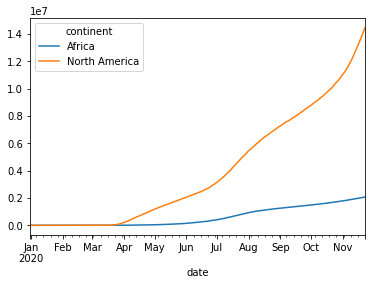

In [56]:
RelevantContinents_test.groupby(["date", "continent"]).sum()["total_cases"].unstack(level=-1).plot()

# Hospitalizations project

In [2]:
url = "https://covidtracking.com/data/download/national-history.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

# Hsp = RelevantCountries.pivot(columns='iso_code', values='hospitalizedCumulative')
# RelevantCountries = RelevantCountries[RelevantCountries.index > "2020-03-01"]
# # RelevantCountries.to_csv("RelevantCountries.cases.csv")

## hopkins

In [ ]:
# data here: https://github.com/CSSEGISandData/COVID-19


## usafacts

#### hi dad

In [40]:
ufacts = "covid_confirmed_usafacts.csv"
fcts = pd.read_csv(ufacts)

FileNotFoundError: [Errno 2] File covid_confirmed_usafacts.csv does not exist: 'covid_confirmed_usafacts.csv'

In [18]:
fcts

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,74,84,91,93,103,103,110,110,120,127
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,222,224,227,231,243,244,254,254,260,262
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,59,61,67,69,74,79,79,81,85,90
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,46,46,46,46,46,49,50,50,50,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,12,13,13,13,14,15,16,16,16,24
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,67,67,67,68,68,68,69,69,69,100
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,7,7,7,7,7,7,8,8,8,11
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,5,5,5,5,5,5,6,13,13,16


In [21]:
kc = fcts.query("countyFIPS == 53033")
kc

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
3019,53033,King County,WA,53,1,1,1,1,1,1,...,7007,7068,7137,7212,7290,7325,7426,7472,7515,7565


In [23]:
kc.melt(id_vars = ["countyFIPS", "County Name", "State", "stateFIPS"], var_name="date")

,countyFIPS,County Name,State,stateFIPS,date,value
0,53033,King County,WA,53,1/22/20,1
1,53033,King County,WA,53,1/23/20,1
2,53033,King County,WA,53,1/24/20,1
3,53033,King County,WA,53,1/25/20,1
4,53033,King County,WA,53,1/26/20,1
5,53033,King County,WA,53,1/27/20,1
6,53033,King County,WA,53,1/28/20,1
7,53033,King County,WA,53,1/29/20,1
8,53033,King County,WA,53,1/30/20,1
9,53033,King County,WA,53,1/31/20,1
